In [1]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime
from sqlalchemy import Column, Integer, Float, Date, String, ForeignKey
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy.orm import Session
from sqlalchemy import Index
from sqlalchemy import MetaData
from sqlalchemy import Table
import csv
import pandas as pd

In [3]:
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
from sqlalchemy import func

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:

inspector = inspect(engine) 
inspector.get_table_names()

['measurement', 'station']

In [10]:
columns = inspector.get_columns('station_table')
for c in columns:
    print(c['name'], c["type"])

In [11]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()


['measurement', 'station']

In [12]:

Station=Base.classes.station

In [13]:
mapper = inspect(Measurement)
print(mapper)

Mapper|measurement|measurement


In [14]:
mapper = inspect(Station)
print(mapper)

Mapper|station|station


In [15]:
Session = sessionmaker(bind=engine)
session = Session()

In [16]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [17]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [18]:

prcp_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between('2016-08-20', '2017-08-20')).all()
last_12_months_of_precipitation_data=prcp_results
last_12_months_of_precipitation_data

[('2016-08-20', 0.0),
 ('2016-08-21', 0.12),
 ('2016-08-22', 0.4),
 ('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03

In [19]:
date = [prcp_results[0] for prcp_result in prcp_results[0:]]
prcp= [prcp_results[1] for prcp_result in prcp_results[0:]]
prcp_df= pd.DataFrame(prcp_results[0:], columns=['date', 'prcp'] )
prcp_df.set_index('date', inplace=True, )
prcp_df.head(5)

,prcp
date,
2016-08-20,0.00
2016-08-21,0.12
2016-08-22,0.40
2016-08-23,0.00
2016-08-24,0.08


In [20]:
prcp_list = prcp_df["prcp"].tolist()

<IPython.core.display.Javascript object>


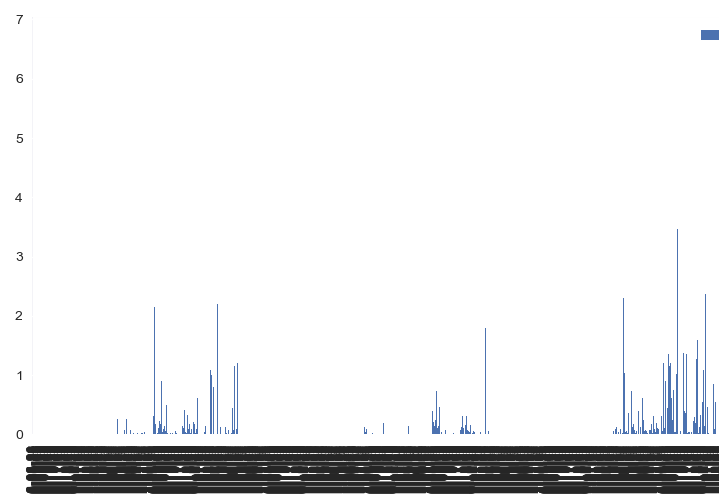

In [21]:
prcp_df.plot.bar(grid=True)
plt.tight_layout()
plt.show()

In [22]:
prcp_df= pd.DataFrame(prcp_results[0:], columns=['date', 'prcp'] )
prcp_df.head(5)

,date,prcp
0,2016-08-20,0.00
1,2016-08-21,0.12
2,2016-08-22,0.40
3,2016-08-23,0.00
4,2016-08-24,0.08


In [23]:

prcp_df.describe()

,prcp
count,2027.000000
mean,0.179724
std,0.464142
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [24]:
total_number_of_stations = session.query(Measurement.station).distinct(Measurement.station).count()
print("Total number of stations is "+ str(total_number_of_stations))

Total number of stations is 9


In [25]:

Desc_active_stations = session.query(Measurement.station, func.count(Measurement.prcp)).\
                                     group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).all()
Desc_active_stations

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [26]:
Most_active_stations = session.query(Measurement.station).\
                                     group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).limit(1).scalar()
print ( "Station which has the highest number of observations is  " + str(Most_active_stations))

Station which has the highest number of observations is  USC00519281


In [27]:
tobs_results = session.query(Measurement.station, Measurement.tobs).filter(Measurement.date.between('2016-08-20', '2017-08-')).all()
tobs_results

[('USC00519397', 80.0),
 ('USC00519397', 76.0),
 ('USC00519397', 77.0),
 ('USC00519397', 81.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 77.0),
 ('USC00519397', 78.0),
 ('USC00519397', 78.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 81.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 75.0),
 ('USC00519397', 79.0),
 ('USC00519397', 76.0),
 ('USC00519397', 76.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 78.0),
 ('USC00519397', 76.0),
 ('USC00519397', 78.0),
 ('USC00519397', 78.0),
 ('USC00519397', 75.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 81.0),
 ('USC00519397', 77.0),
 ('USC00519397', 77.0),
 ('USC00519397', 78.0),
 ('USC00519397', 76.0),
 ('USC00519397', 82.0),
 ('USC00519397', 81.0),
 ('USC00519397', 78.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397',

# Exploratory Climate Analysis

In [28]:
Most_active_stations_tobs_results = session.query(Measurement.station, Measurement.tobs).\
                                   filter(Measurement.date.between('2016-08-01', '2017-08-01')).\
                                   filter(Measurement.station == Most_active_stations).all()
Most_active_stations_tobs_results

[('USC00519281', 76.0),
 ('USC00519281', 76.0),
 ('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 81.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 81.0),
 ('USC00519281', 81.0),
 ('USC00519281', 82.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 75.0),
 ('USC00519281', 74.0),
 ('USC00519281', 82.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 81.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281',

In [29]:
Most_active_stations_temp = [result[1] for result in Most_active_stations_tobs_results[0:]]

<IPython.core.display.Javascript object>


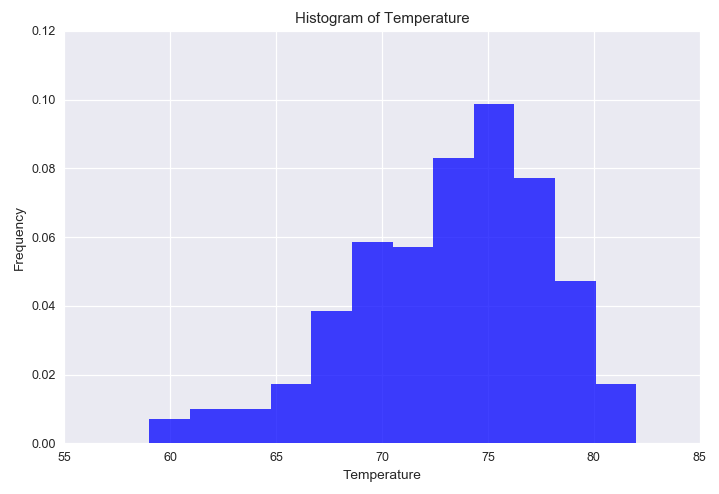

In [35]:
plt.hist(Most_active_stations_temp, bins = 12, align='mid', label="tobs", alpha=0.75, normed=1,color="b")
plt.title('Last Year Temperature at Station USC00519281')
plt.xlabel('Temperature')
plt.ylabel("Frequency")
plt.axis([55, 85, 0, 0.12])
plt.title('Histogram of Temperature')
plt.tight_layout()

plt.show()

In [32]:

Temp=[]
start_date='2016-08-01'
end_date='2017-08-01'
def calc_temps(start_date, end_date):
    results=session.query(func.max(Measurement.tobs).label("max_tobs"), \
                          func.min(Measurement.tobs).label("min_tobs"),\
                          func.avg(Measurement.tobs).label("avg_tobs")).\
                          filter(Measurement.date.between(start_date , end_date))  
    res = results.one()
    res
    TMAX = res.max_tobs
    TMIN= res.min_tobs
    TAVG= res.avg_tobs
    Temp.append(TMAX)
    Temp.append(TMIN)
    Temp.append(TAVG)
  
calc_temps(start_date, end_date)
Temp

[87.0, 58.0, 74.64288840262581]

In [33]:
TAVG=Temp[2]
TMIN=Temp[1]
TMAX=Temp[0]

C:\ProgramData\Anaconda3\envs\Milad\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


<IPython.core.display.Javascript object>


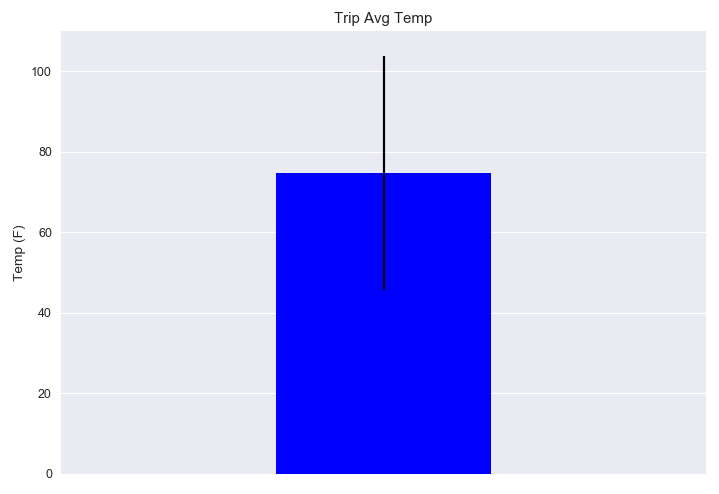

In [34]:
plt.bar( 1,TAVG, color = 'blue', yerr = TMAX-TMIN, align='center')
plt.xlim(-0.2, 2.2)
plt.ylim([0, 110])
plt.axes().get_xaxis().set_visible(False)
plt.title('Trip Avg Temp')
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.show()